SOURCE

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Practiced these graphs using the above tutorials

- Visual Guide to Charts Included below:

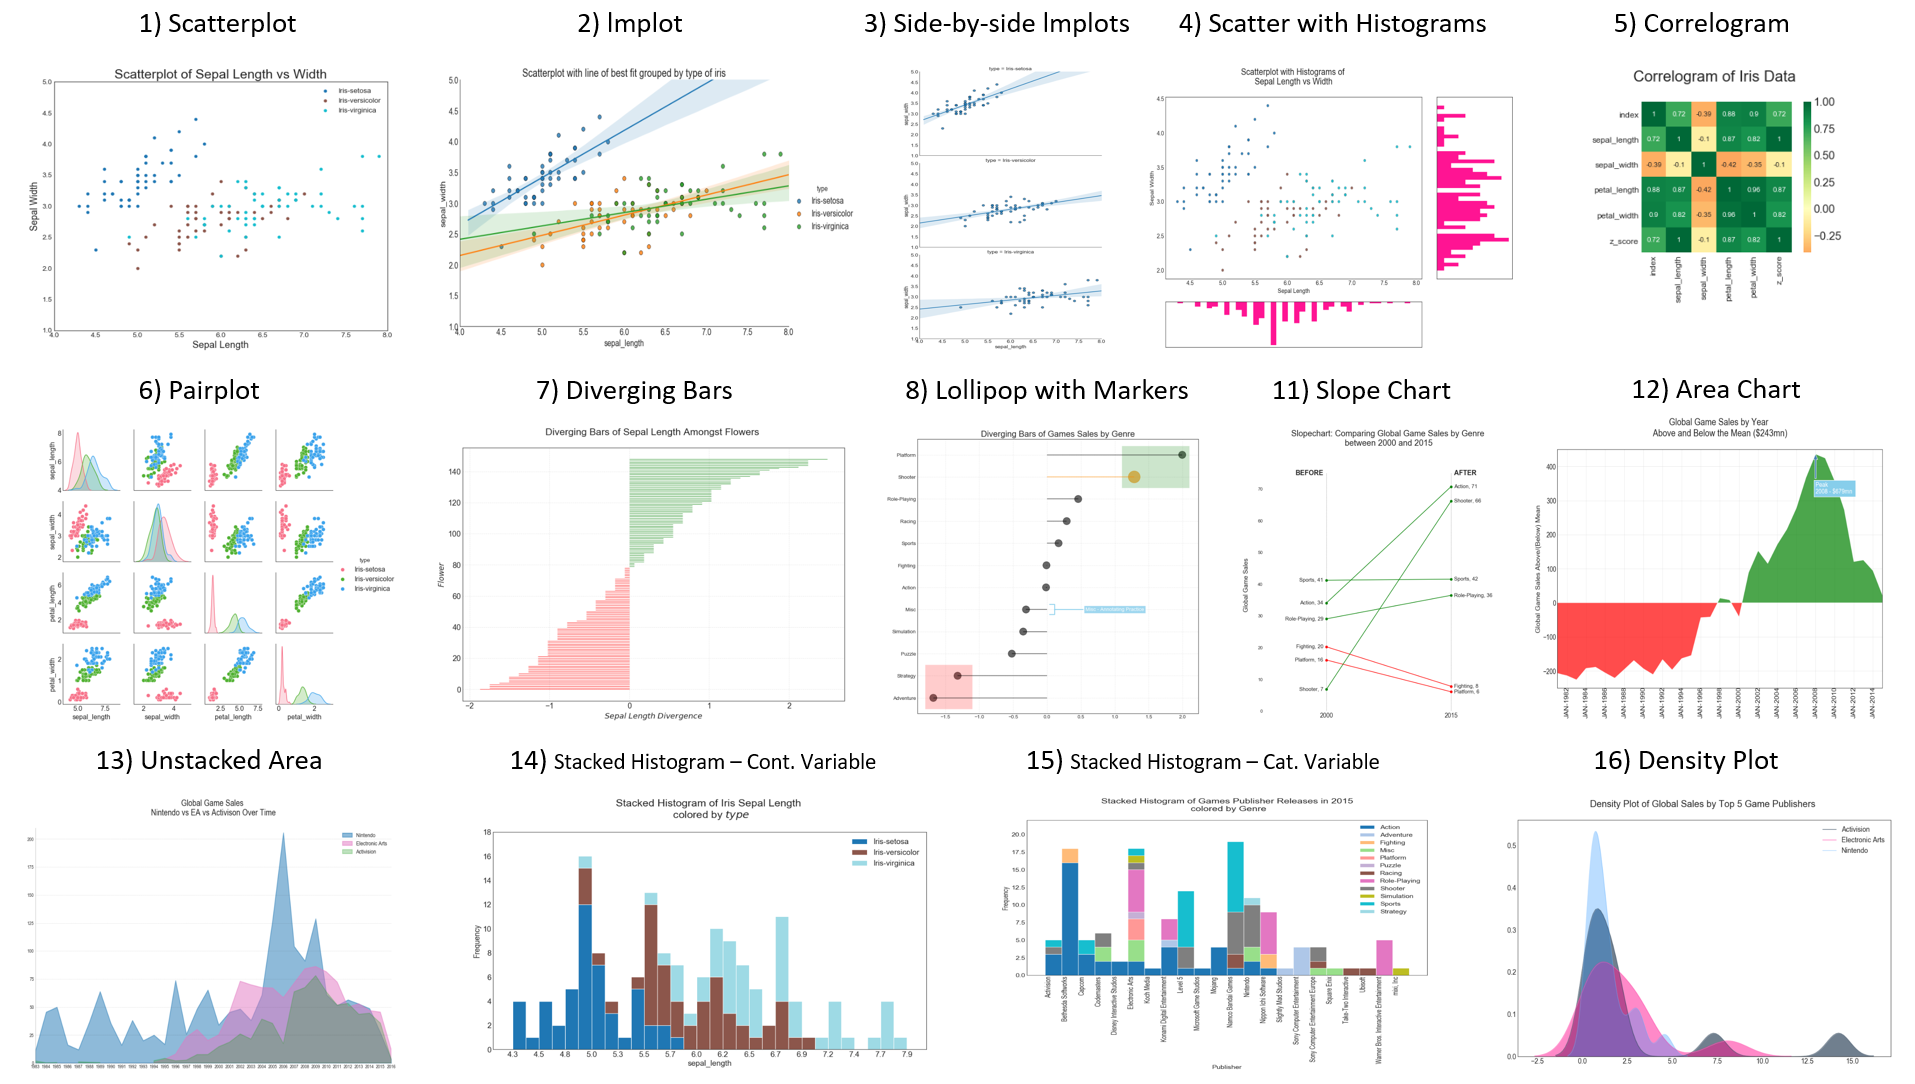

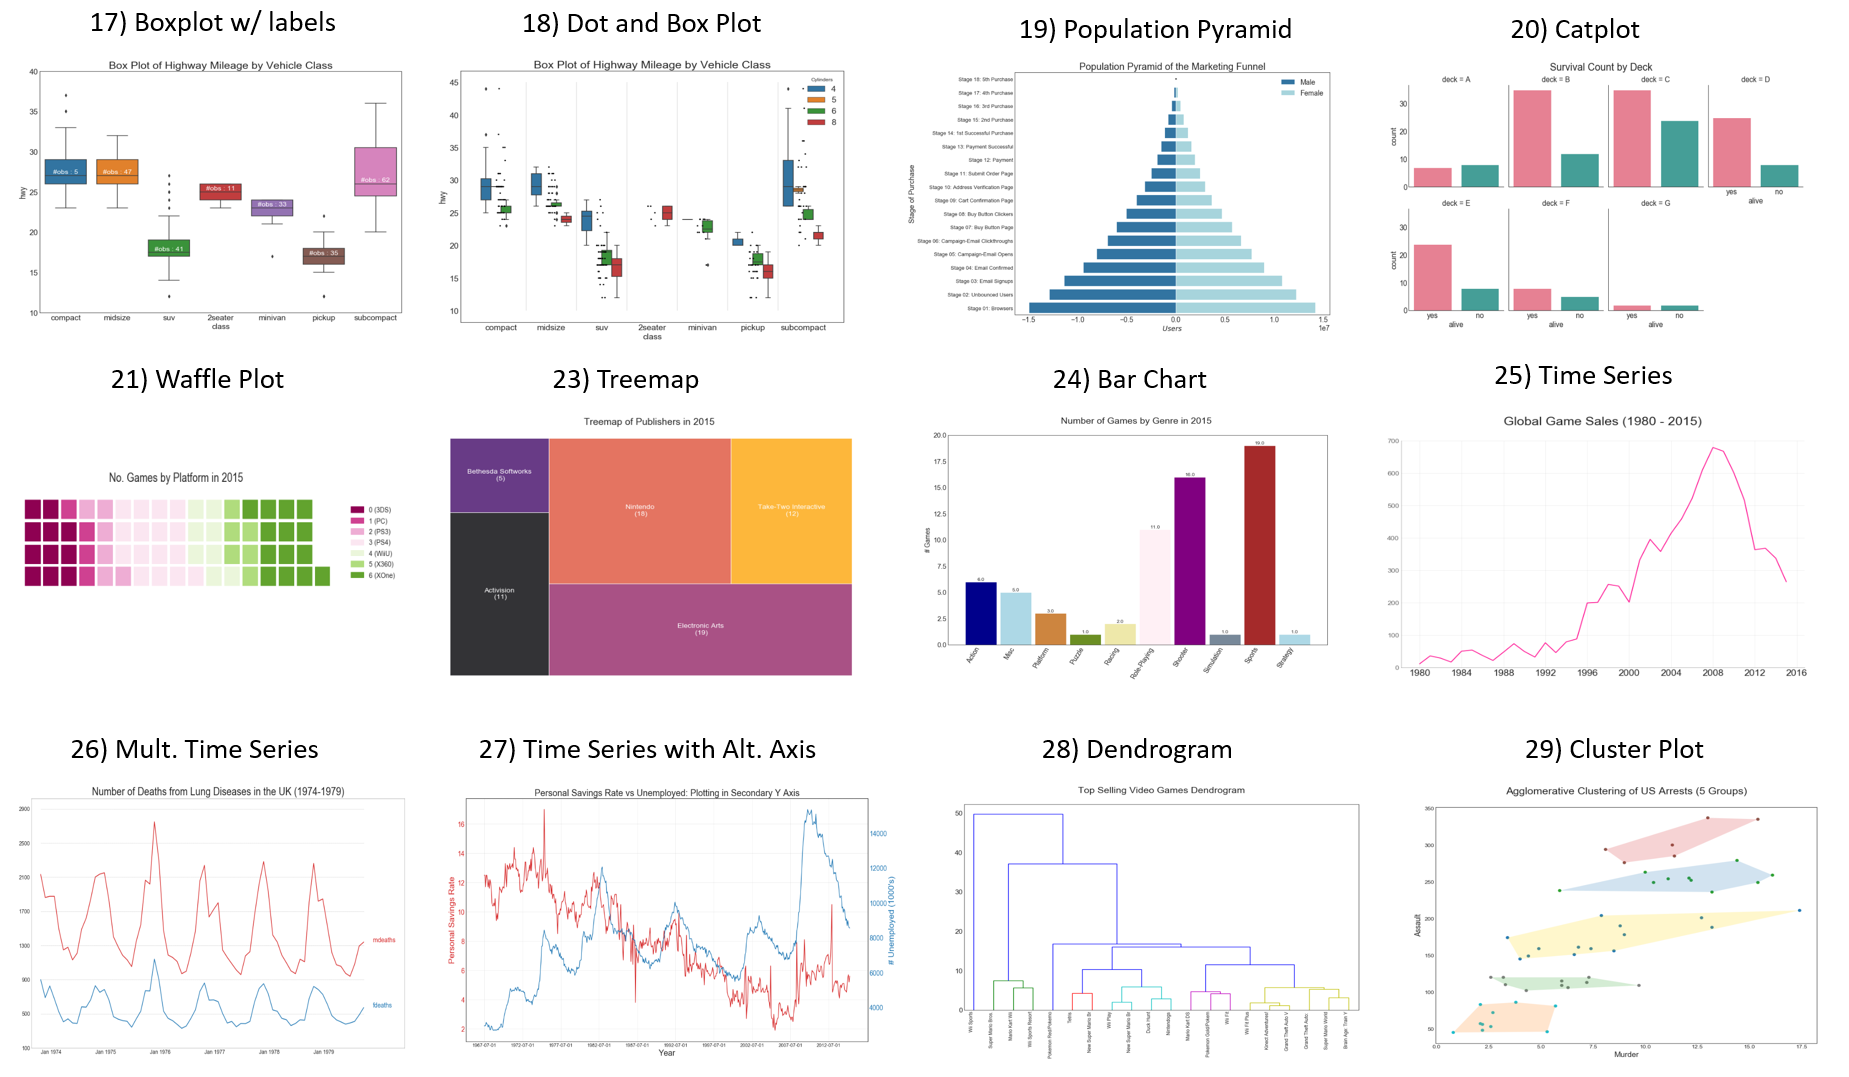

In [2]:
# Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [3]:
# Style
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

First Data Set - and short cleaning

In [62]:
iris = pd.read_csv('iris.data')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "type"]
iris.columns = attributes

In [63]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [64]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Scatter Plot

In [71]:
# How to create as many colours as there are categories

categories = np.unique(iris["type"])

colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

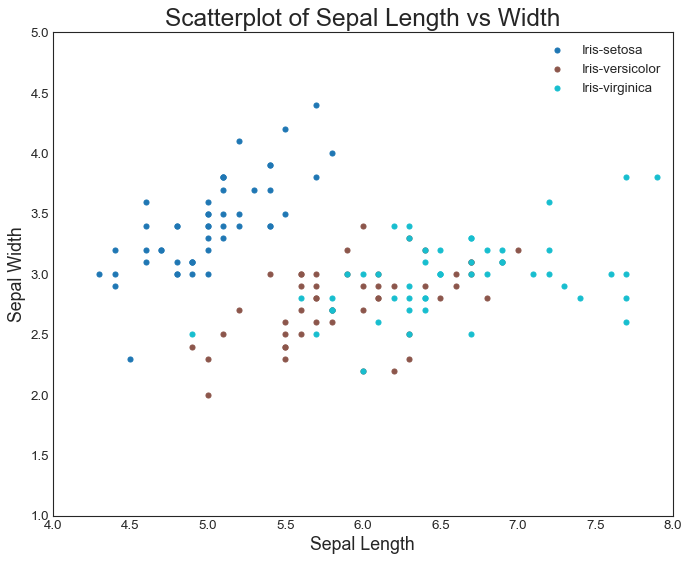

In [73]:
# Draw a plot for each category

plt.figure(figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')

# Figure size (figsize) determines the size of the figure in inches. 
#This gives the amount of space the axes (and other elements) have inside the figure. 
#The default figure size is (6.4, 4.8) inches in matplotlib 2. 
#Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100.

for i, type in enumerate(categories):
    plt.scatter('sepal_length', 'sepal_width', 
                data = iris.loc[iris.type==type, :],
                s = 20, c = np.array([colors[i]]), label = str(type), alpha = 1)

    # s = area, c = colors, can also add alpha = transparency

# enumerate allows us to loop over something and have an automatic counter
    
# Decorations
plt.gca().set(xlim=(4.0, 8.0), ylim=(1.0, 5.0),
              xlabel='Sepal Length', ylabel='Sepal Width')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Sepal Length vs Width", fontsize=22)
plt.legend(fontsize=12)    
plt.show();   

# Scatter plot with linear regression line of best fit -- (lmplot)

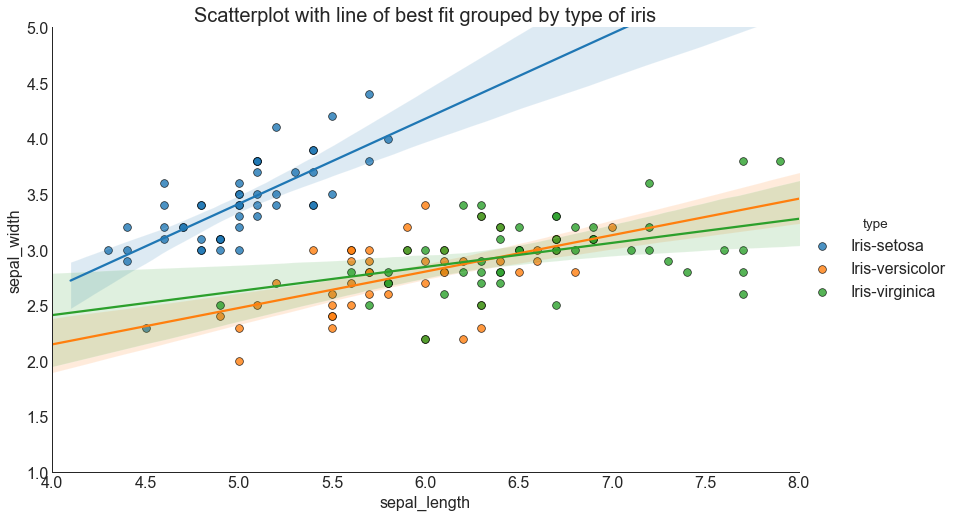

In [80]:
graph = sns.lmplot(x = 'sepal_length', y = 'sepal_width',
                   hue = 'type', data = iris, 
                   height = 7, aspect = 1.6, robust = True, palette = 'tab10',
                   scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
graph.set(xlim=(4.0, 8.0), ylim=(1.0, 5.0))
plt.title("Scatterplot with line of best fit grouped by type of iris", fontsize=20)
plt.show()

# Side by Side lmplots

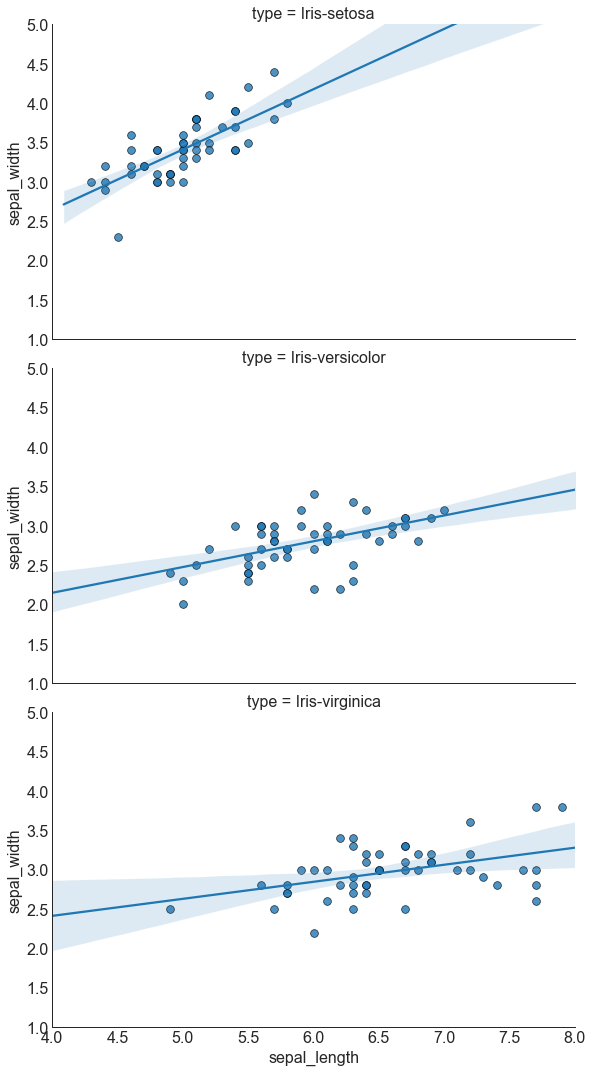

In [84]:
# To do this, just change "hue = 'type'" above into "col = 'type'", or "row = 'type'" as shown below:

graph = sns.lmplot(x = 'sepal_length', y = 'sepal_width',
                   data = iris, row = 'type',
                   height = 5, aspect = 1.6, robust = True, palette = 'tab10',
                   scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
graph.set(xlim=(4.0, 8.0), ylim=(1.0, 5.0))
plt.show()

# Scatter Plot with Histograms

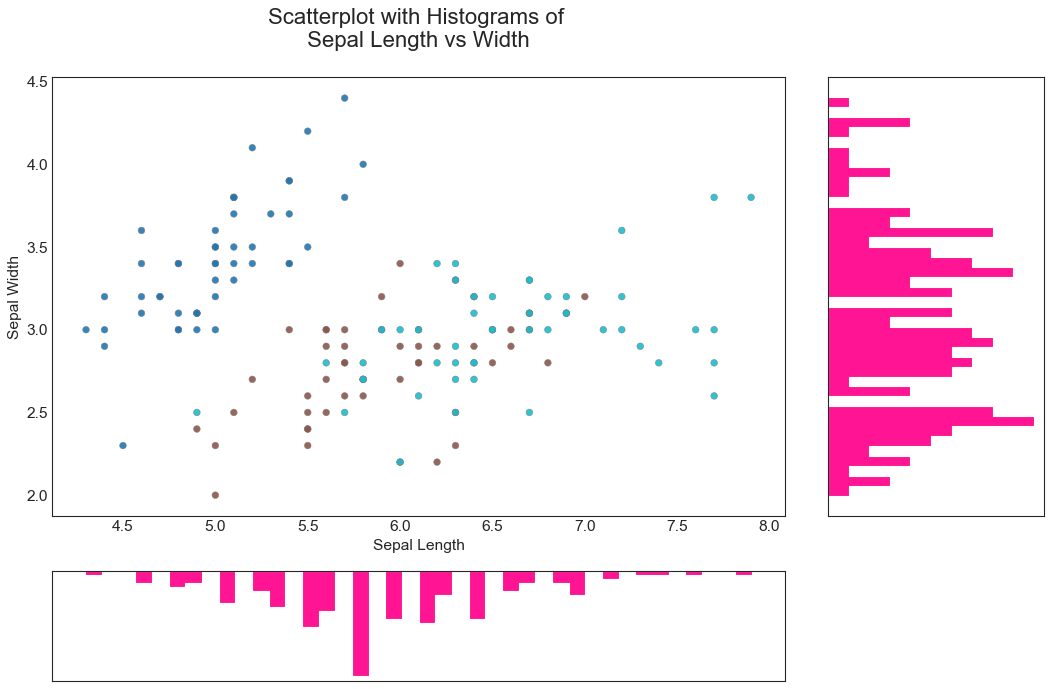

In [104]:
# Creating figsize and gridspec

fig = plt.figure(figsize = (16, 10), dpi = 80)
grid = plt.GridSpec(4, 4, hspace = 0.5, wspace = 0.2)

# Defining the axes

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1,0 :-1], xticklabels=[], yticklabels=[])

# Scatterplot on the main ax

ax_main.scatter('sepal_length', 'sepal_width', c = iris.type.astype('category').cat.codes, alpha = 0.9, data = iris, 
               cmap = 'tab10', edgecolors = 'gray', linewidths = 0.5)

# Histogram on the right (hist params here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)

ax_right.hist(iris.sepal_length, bins = 40, histtype = 'stepfilled', orientation = 'horizontal', color = 'deeppink')

# Histogram at the bottom

ax_bottom.hist(iris.sepal_width, bins = 40, histtype = 'stepfilled', orientation = 'vertical', color = 'deeppink')
ax_bottom.invert_yaxis() # turns it upside down

# Decorations
ax_main.set(title='Scatterplot with Histograms of \n Sepal Length vs Width \n', xlabel='Sepal Length', ylabel='Sepal Width')
ax_main.title.set_fontsize(20) # Used \n to add space below Chart Title
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14) # Axis and tick labels fontsize

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

# Correlogram (Heatmap)

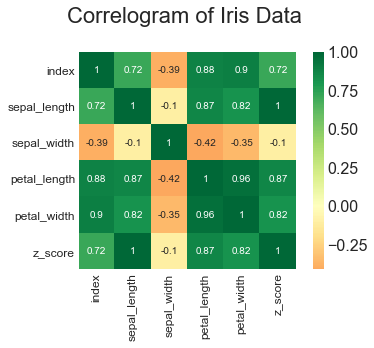

In [154]:
# Plotting (no longer setting figsize/dpi bc they are specified a the top as defaults)

ax = sns.heatmap(iris.corr(), xticklabels=iris.corr().columns, yticklabels=iris.corr().columns,
           cmap = 'RdYlGn', center = 0, annot = True, square = True)

# Using the below to correct for errors in correlogram, making the squares uneven, fixed in version 3.1.2 of matplotlib
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Decorations
plt.title('Correlogram of Iris Data \n', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Pairwise Plot (Pairplot)

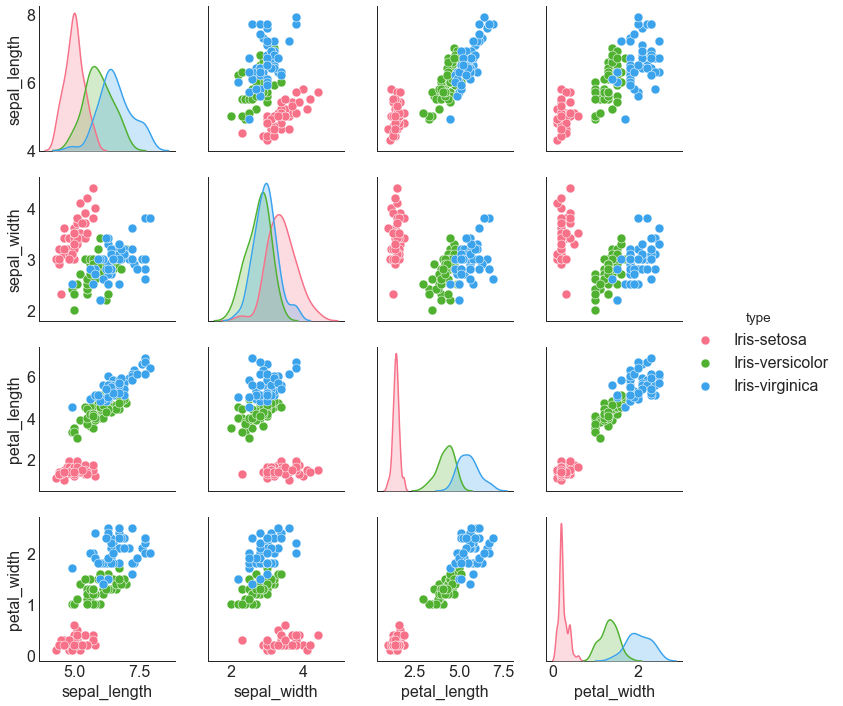

In [135]:
# Plotting:

sns.pairplot(iris, kind = 'scatter', hue = 'type', palette = 'husl', 
             plot_kws=dict(s=80, edgecolor='white', linewidth = 0.5) );

# plot_kws = plot keywords, above we are changing linewidth, size and edgecolor
# Palette is the seaborn colors, found here: https://seaborn.pydata.org/tutorial/color_palettes.html


# Diverging Bars (from the z-score)

In [138]:
# Setting the subset to inspect, in this case, all rows and the sepal_length column

x = iris.loc[:, ['sepal_length']]

# Creating a new column, with values as they deviate from the mean as measured by the z-score 
# i.e. how many std's from the mean are they:

iris['z_score'] = (x - x.mean())/x.std()

# Setting the colors to be green if > z_score ,red if < z_score

iris['colors'] = ['red' if x < 0 else 'green' for x in iris['z_score']]

# Sorting and reindexing for plotting:
iris.sort_values('z_score', inplace=True)
iris.reset_index(inplace=True)

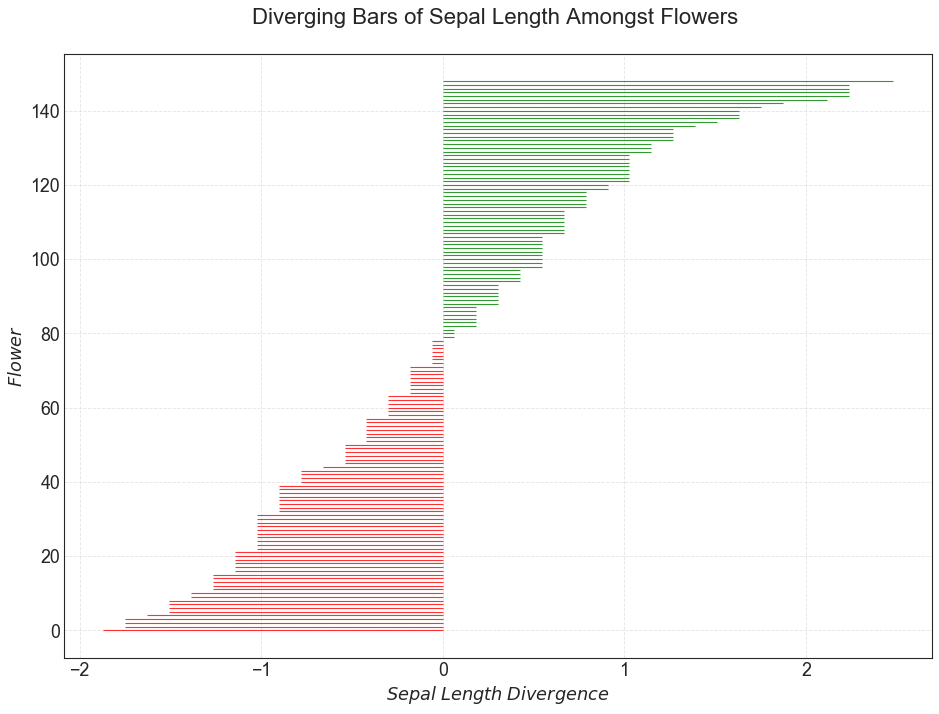

In [156]:
# Plotting:
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y = iris.index, xmin = 0, xmax = iris.z_score, colors = iris.colors, alpha = 0.8, linewidth = 1)

# Decorations
plt.gca().set(xlabel='$Sepal$ $Length$ $Divergence$', ylabel='$Flower$') # $ signs create italics

plt.title('Diverging Bars of Sepal Length Amongst Flowers \n', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

- New Dataset - Games

In [406]:
# Importing new data to use for below charts

games = pd.read_csv('07_group_project_1/data/video_game_sales.csv')
del games["NA_Sales"]
del games["EU_Sales"]
del games["JP_Sales"]
del games["Other_Sales"]
games = games.dropna()

print(games.shape)


(16291, 7)


In [184]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [185]:
games.describe(include = 'all')

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
count,16291.000000,16291,16291,16291.000000,16291,16291,16291.000000
unique,NaN,11325,31,NaN,12,576,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN
freq,NaN,12,2131,NaN,3251,1339,NaN
mean,8290.190228,NaN,NaN,2006.405561,NaN,NaN,0.540910
std,4792.654450,NaN,NaN,5.832412,NaN,NaN,1.567345
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.010000
25%,4132.500000,NaN,NaN,2003.000000,NaN,NaN,0.060000
50%,8292.000000,NaN,NaN,2007.000000,NaN,NaN,0.170000
75%,12439.500000,NaN,NaN,2010.000000,NaN,NaN,0.480000


In [186]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
Global_Sales    float64
dtype: object

In [202]:
gen_sales = games.groupby('Genre')['Global_Sales'].mean()

gen_sales = gen_sales.reset_index()
gen_sales.head()

,Genre,Global_Sales
0,Action,0.529942
1,Adventure,0.184137
2,Fighting,0.531160
3,Misc,0.468488
4,Platform,0.947577


# Lollipop chart with markers

In [203]:
# Testing Diverging Bars with Data First
x = gen_sales.loc[:, ['Global_Sales']]

gen_sales['z_score'] = (x - x.mean())/x.std()
gen_sales['colors'] = ['red' if x < 0 else 'green' for x in gen_sales['z_score']]

gen_sales.sort_values('z_score', inplace=True)
gen_sales.reset_index(inplace=True)

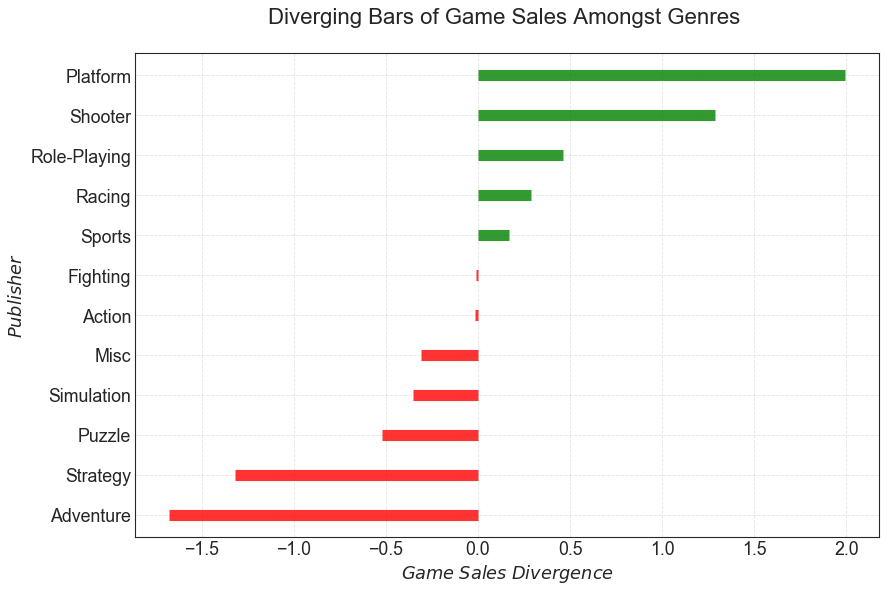

In [208]:
plt.figure(figsize=(12,8), dpi= 80)
plt.hlines(y = gen_sales.Genre, xmin = 0, xmax = gen_sales.z_score, colors = gen_sales.colors, alpha = 0.8, linewidth = 10)

plt.gca().set(xlabel='$Game$ $Sales$ $Divergence$', ylabel='$Publisher$') # $ signs create italics
plt.title('Diverging Bars of Game Sales Amongst Genres \n', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [221]:
# Now trying the lollipop chart:

# x and z_score column have already been set above.

# Setting color of lollipop
gen_sales['colors'] = 'black'

# Color Role-Playing differently
gen_sales.loc[gen_sales.Genre == 'Shooter', 'colors'] = 'darkorange'
gen_sales.sort_values('z_score', inplace=True)
#gen_sales.reset_index(inplace=True) # can't reset this twice, so have #'d it out here to prevent error on re-running

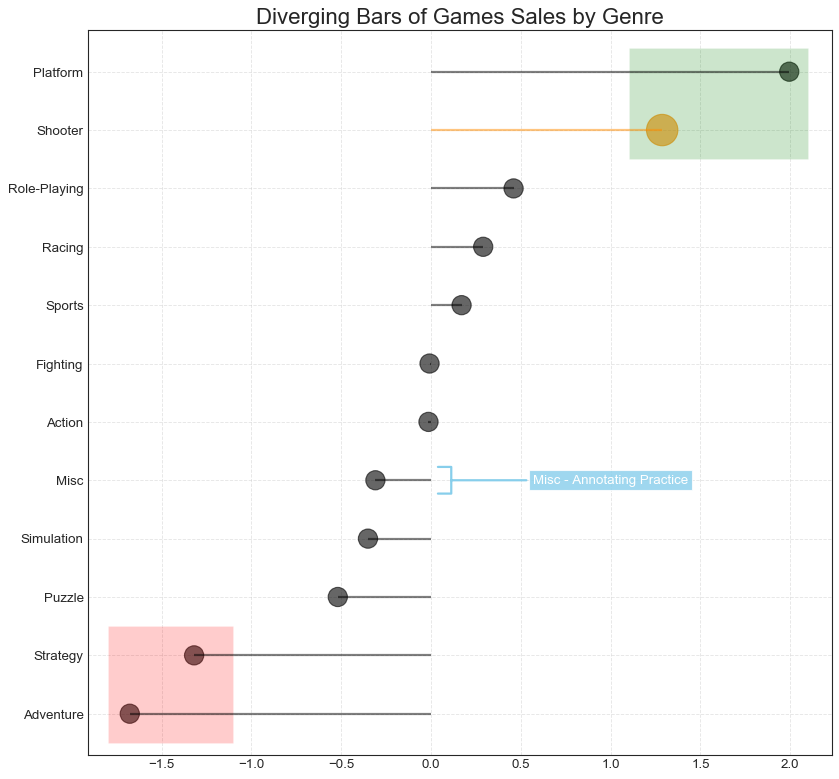

In [250]:
# Drawing plot
import matplotlib.patches as patches

plt.figure(figsize = (12, 12), dpi = 80)
plt.hlines(y=gen_sales.Genre, xmin = 0, xmax = gen_sales.z_score, colors = gen_sales.colors, alpha = 0.5, linewidth = 2)
plt.scatter(gen_sales.z_score, gen_sales.Genre, color = gen_sales.colors, 
            s= [800 if x == 'Shooter' else 300 for x in gen_sales.Genre], alpha = 0.6) # setting size of circle larger
plt.yticks(gen_sales.Genre, fontsize = 12)
plt.xticks(fontsize = 12)

# Annotating

plt.annotate('Misc - Annotating Practice', xy=(0.1, 4.0), xytext=(1.0, 4), xycoords='data', #sets location of annotation box
            fontsize=12, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='skyblue', alpha = 0.8), #sets color and style of box/text
            arrowprops=dict(arrowstyle='-[, widthB=1.0, lengthB=1.0', lw=2.0, color='skyblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-1.8, -0.5), width=0.7, height=2.0, alpha=.2, facecolor='red') #xyco-ords, then height and width of area
p2 = patches.Rectangle((1.1, 9.5), width=1.0, height=1.9, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Games Sales by Genre', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Vertical Lollipop

 - NOTE: To change the above to a vertical lollipop chart use "plt.vlines" instead of "plt.hlines"

# Dot Plots

 - You can also use hlines to form gridlines, like the below code:
 
 ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
 
 
 - Then you plot the size of the scatter plot dots along those lines, like the chart above.

# Slope Chart

In [265]:
# Preparing Data, comparing 2000 with 2015
# Setting the new database to only have two years:

games_slope = games[(games["Year"] == 2000) | (games["Year"] == 2015)]

games_slope = games_slope.groupby(['Genre', 'Year'])['Global_Sales'].sum()
games_slope = games_slope.reset_index()
games_slope.head()


,Genre,Year,Global_Sales
0,Action,2000.0,34.04
1,Action,2015.0,70.70
2,Adventure,2000.0,2.98
3,Adventure,2015.0,8.03
4,Fighting,2000.0,20.22


In [312]:
# Pivotting the data
gs = pd.pivot_table(games_slope, values='Global_Sales', index=['Genre'],
                    columns=['Year'], aggfunc=np.sum)

gs = gs.reset_index()
#Removing some less useful genres to clean up chart below
gs = gs[(gs["Genre"] != 'Simulation')& (gs["Genre"] != 'Puzzle') & (gs["Genre"] != 'Adventure')& (gs["Genre"] != 'Strategy') & (gs["Genre"] != 'Misc') & (gs["Genre"] != 'Racing')]
gs

Year,Genre,2000.0,2015.0
0,Action,34.04,70.70
2,Fighting,20.22,7.78
4,Platform,16.06,6.05
7,Role-Playing,29.03,36.44
8,Shooter,6.81,66.15
10,Sports,41.19,41.54


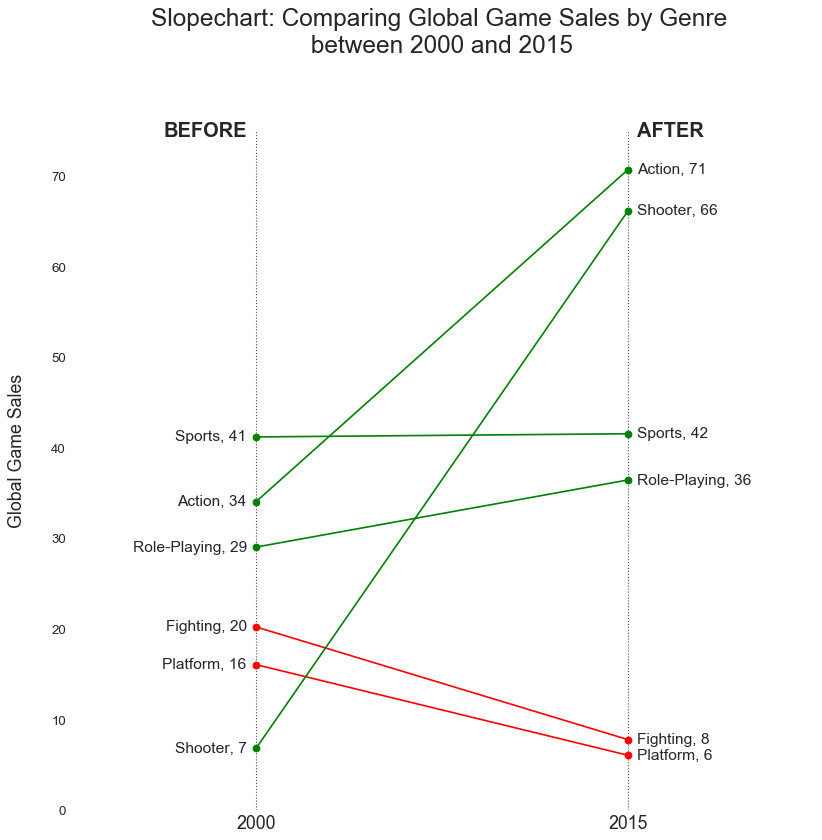

In [314]:
import matplotlib.lines as mlines

# Labelling and coloring:
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(gs.Genre, gs[2000.0])] # if 2000 would be a string, then '' it!
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(gs.Genre, gs[2015.0])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(gs[2000.0], gs[2015.0])]

# draw line function, see below for source
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

# Setting size, plots etc
fig, ax = plt.subplots(1,1,figsize=(12,12), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=75, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=75, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=gs[2000], x=np.repeat(1, gs.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=gs[2015], x=np.repeat(3, gs.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(gs[2000], gs[2015], gs['Genre']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
    
# 'Before' and 'After' Annotations
ax.text(1-0.05, 75, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 75, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing Global Game Sales by Genre \n between 2000 and 2015 \n", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,80), ylabel="Global Game Sales \n")
ax.set_xticks([1,3])
ax.set_xticklabels(["2000", "2015"])
plt.yticks(np.arange(0, 75, 10), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

# Area Chart

In [389]:
# Preparing Data

yearly = games.groupby('Year')['Global_Sales'].sum().reset_index()
yearly = yearly[(yearly["Year"] != 2017)& (yearly["Year"] != 2020)& (yearly["Year"] != 2016)]
yearly.head()

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


In [391]:
# Changing Year to datetime for the plot below:
yearly['Year'] = pd.to_datetime(yearly['Year'], format = "%Y")

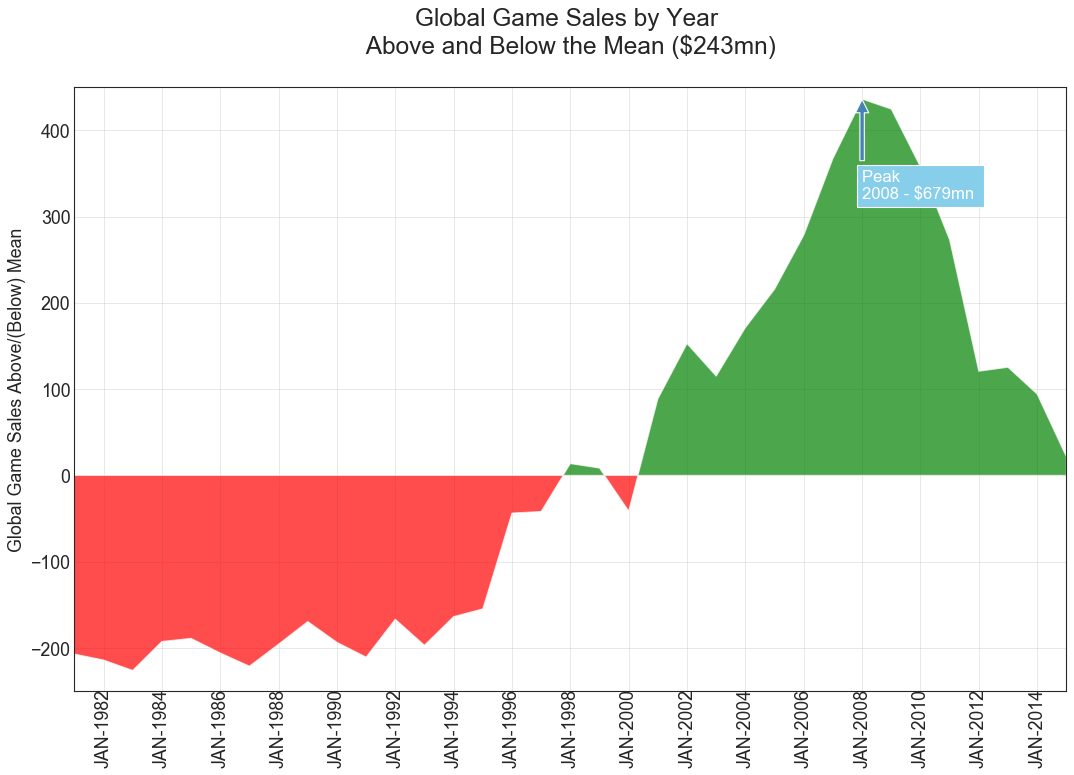

In [392]:
# Plotting:
n = yearly.loc[:, ['Global_Sales']]

xo = np.arange(yearly.shape[0]) # creates a matrix of the tick numbers
yearly['diffs'] = (n - n.mean()) # Creating a new column with difference from the mean
y_diffs = yearly.diffs

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(xo[1:], y_diffs[1:], 0, where=y_diffs[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(xo[1:], y_diffs[1:], 0, where=y_diffs[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n2008 - $679mn ', xy=(28.0, 440.0), xytext=(28.0, 320),
             bbox=dict(boxstyle='square', fc='skyblue'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(yearly.Year.dt.year, yearly.Year.dt.month_name())]
plt.gca().set_xticks(xo[::2]) # Sets x tick labels for the bottom
plt.gca().set_xticklabels(xtickvals[::2], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-250,450)
plt.xlim(1,35)
plt.title("Global Game Sales by Year \n Above and Below the Mean ($243mn) \n", fontsize=22)
plt.ylabel('Global Game Sales Above/(Below) Mean')
plt.grid(alpha=0.5)
plt.show()

In [385]:
yearly.Global_Sales.mean()

242.79805555555555

# Area Chart UnStacked
An unstacked area chart is used to visualize the progress (ups and downs) of two or more series with respect to each other.

In [672]:
# Prepping Data, just leaving two publishers from the game data as a time series
nind_ea = games.groupby(['Year','Publisher'])["Global_Sales"].sum().reset_index()

nind_ea = nind_ea[(nind_ea["Publisher"] == 'Nintendo') | (nind_ea['Publisher']=='Electronic Arts') | (nind_ea['Publisher']=='Activision')]

nind_ea = pd.pivot_table(nind_ea, values='Global_Sales', index=['Year'],
                    columns=['Publisher'], aggfunc=np.sum)

nind_ea = nind_ea.reset_index()

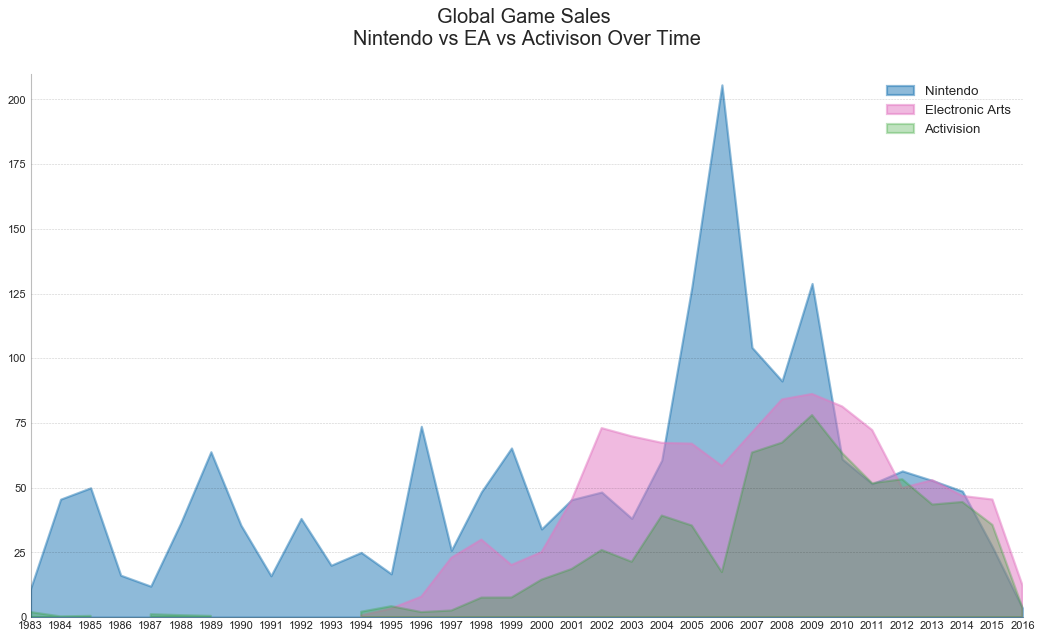

In [681]:
# More prepping
x = nind_ea['Year'].values.tolist()
y1 = nind_ea['Nintendo'].values.tolist()
y2 = nind_ea['Electronic Arts'].values.tolist()
y3 = nind_ea['Activision'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['Electronic Arts', 'Nintendo', 'Activision']


# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[6], linewidth=2)
ax.fill_between(x, y1=y3, y2=0, label=columns[2], alpha=0.3, color=mycolors[2], linewidth=2)

# Decorations
ax.set_title('Global Game Sales \nNintendo vs EA vs Activison Over Time\n', fontsize=18)
ax.set(ylim=[0, 210])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::1], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0, 225.0, 25), fontsize=10)
plt.xlim(1983, x[-1])

# Draw Tick lines  
for y in np.arange(25, 225.0, 25):    
    plt.hlines(y, xmin=1983, xmax=2016, colors='black', alpha=0.2, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

In [650]:
nind_ea

Publisher,Year,Electronic Arts,Nintendo
0,1983.0,NaN,10.96
1,1984.0,NaN,45.56
2,1985.0,NaN,49.95
3,1986.0,NaN,16.18
4,1987.0,NaN,11.95
5,1988.0,NaN,36.44
6,1989.0,NaN,63.88
7,1990.0,NaN,35.49
8,1991.0,NaN,15.97
9,1992.0,0.06,38.11


In [647]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")
df

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


# Histogram for Continuous Variable

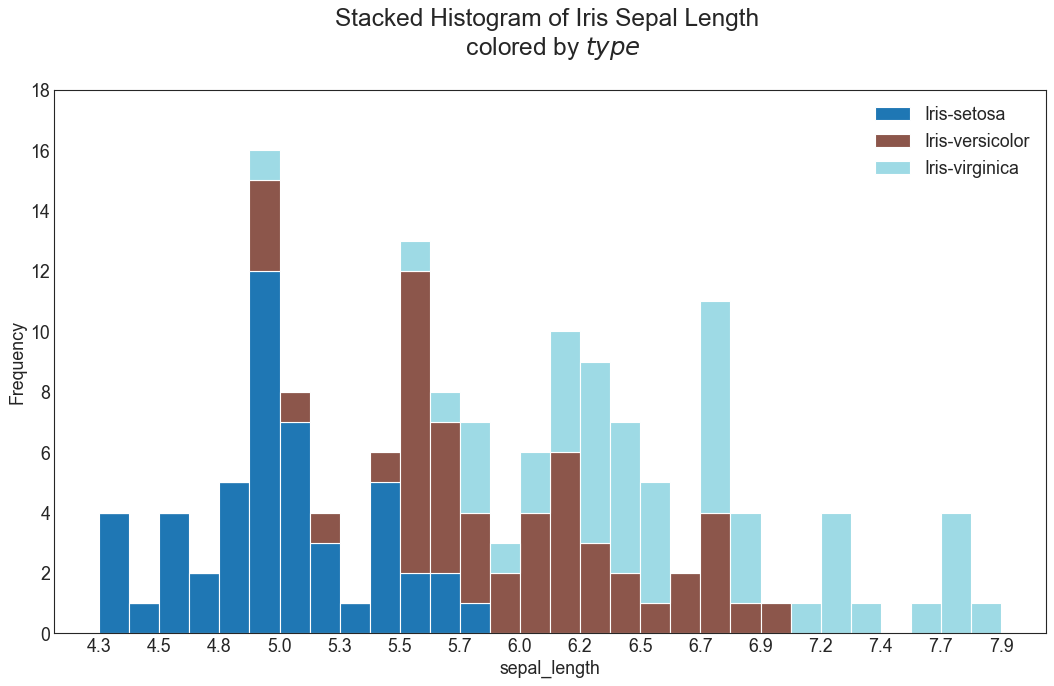

In [451]:
# Using iris data

x = 'sepal_length'
groupby_var = 'type'

iris_agg = iris.loc[:, [x, groupby_var]].groupby(groupby_var)
vals = [iris[x].values.tolist() for i, iris in iris_agg] # Counts the frequency of the groupby var

# Plotting
plt.figure(figsize=(16, 9), dpi = 80)
colors = [plt.cm.tab20(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(iris[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Iris Sepal Length \n colored by ${groupby_var}$ \n", fontsize=22)
plt.xlabel(x)
plt.ylabel("Frequency")
plt.ylim(0, 18)
plt.xticks(ticks=bins[::2], labels=[round(b,1) for b in bins[::2]])
plt.show()

# Histogram for Categorical Variable

In [448]:
# Using game data above just in year 2015:

gs2015 = games[(games["Year"] == 2015)]
gs2015 = gs2015[(gs2015["Global_Sales"] > 0.43)] # Filtering for only games above the original mean global sales value

In [449]:
gs2015.describe(include = 'all')

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
count,137.000000,137,137,137.0,137,137,137.000000
unique,NaN,80,9,NaN,12,22,NaN
top,NaN,LEGO Jurassic World,PS4,NaN,Action,Electronic Arts,NaN
freq,NaN,6,45,NaN,43,19,NaN
mean,2228.058394,NaN,NaN,2015.0,NaN,NaN,1.594088
std,1362.824234,NaN,NaN,0.0,NaN,NaN,1.827465
min,34.000000,NaN,NaN,2015.0,NaN,NaN,0.440000
25%,1001.000000,NaN,NaN,2015.0,NaN,NaN,0.590000
50%,2273.000000,NaN,NaN,2015.0,NaN,NaN,0.920000
75%,3430.000000,NaN,NaN,2015.0,NaN,NaN,1.760000


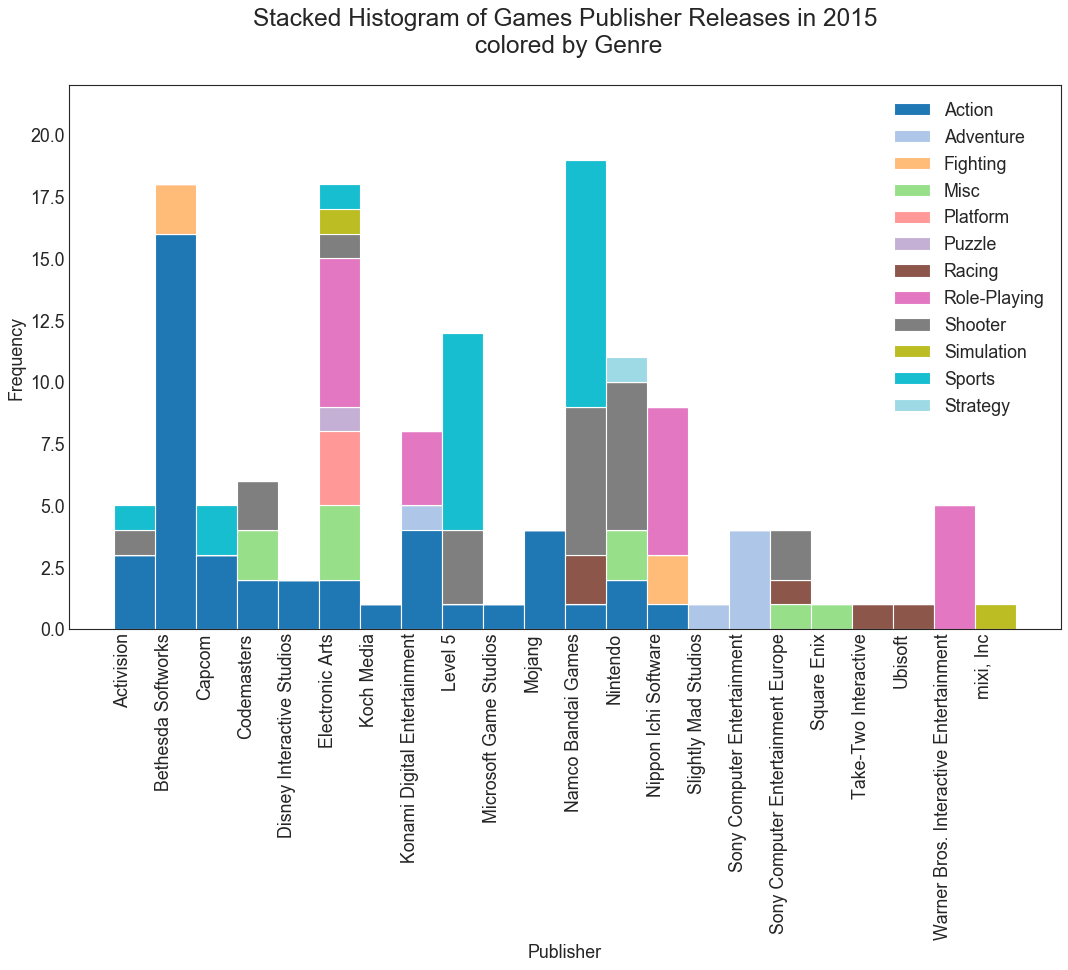

In [461]:
x = 'Publisher'
groupby_var = 'Genre'

gs2015_agg = gs2015.loc[:, [x, groupby_var]].groupby(groupby_var)
vals = [gs2015[x].values.tolist() for i, gs2015 in gs2015_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.tab20(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, gs2015[x].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(gs2015[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Games {x} Releases in 2015\n colored by {groupby_var}\n", fontsize=22)
plt.xlabel(x)
plt.ylabel("Frequency")
plt.ylim(0, 22)
plt.xticks(ticks=bins, labels=np.unique(gs2015[x]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

# Density Plot

In [478]:
# Extracting the 5 Largest Publishers in 2015 = 'Activision', 'Electronic Arts', 'Nintendo', 'Bethesda Softworks', 
#'Take-Two Interactive'

dens = gs2015[(gs2015["Publisher"] == 'Activision') | (gs2015["Publisher"] == 'Electronic Arts')| 
              (gs2015["Publisher"] == 'Nintendo') | (gs2015["Publisher"] == 'Bethesda Softworks') |
              (gs2015["Publisher"] == 'Take-Two Interactive') ]
dens.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,14.24
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,7.67
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,7.30
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,6.96


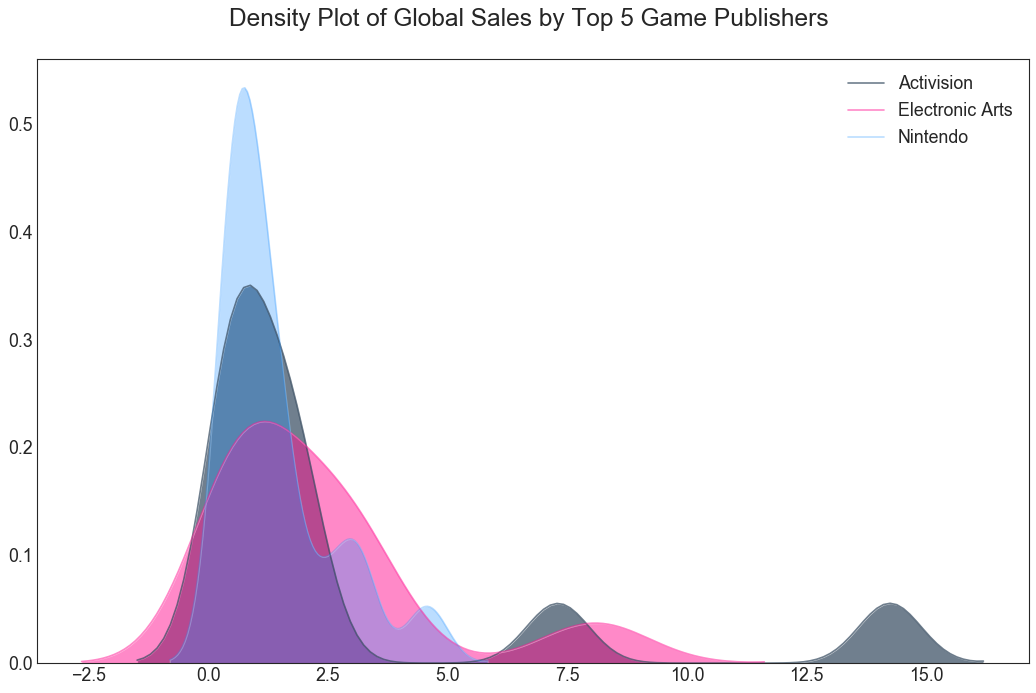

In [487]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)

sns.kdeplot(dens.loc[dens['Publisher'] == 'Activision', "Global_Sales"], shade=True, color="#34495e", label="Activision", alpha=.7)
sns.kdeplot(dens.loc[dens['Publisher'] == 'Electronic Arts', "Global_Sales"], shade=True, color="deeppink", label="Electronic Arts", alpha=.5)
sns.kdeplot(dens.loc[dens['Publisher'] == 'Nintendo', "Global_Sales"], shade=True, color="dodgerblue", label="Nintendo", alpha=.3)
#sns.kdeplot(dens.loc[dens['Publisher'] == 'Bethesda Softworks', "Global_Sales"], shade=True, color="orange", label="Bethesda Softworks", alpha=.7)

# Decoration
plt.title('Density Plot of Global Sales by Top 5 Game Publishers \n', fontsize=22)
plt.legend()
plt.show()

# Box Plot with Labels

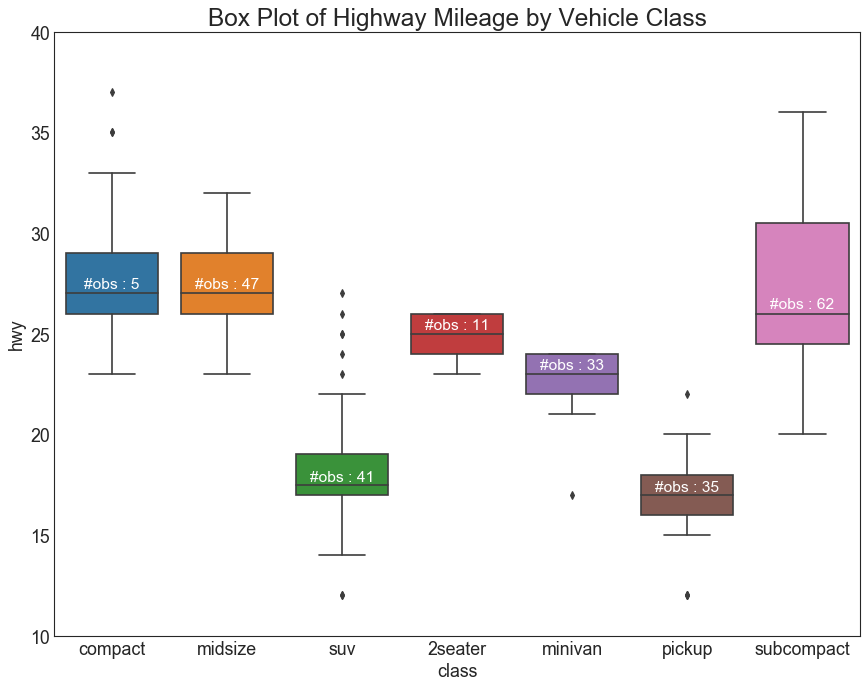

In [490]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

# Dot and Box Plot

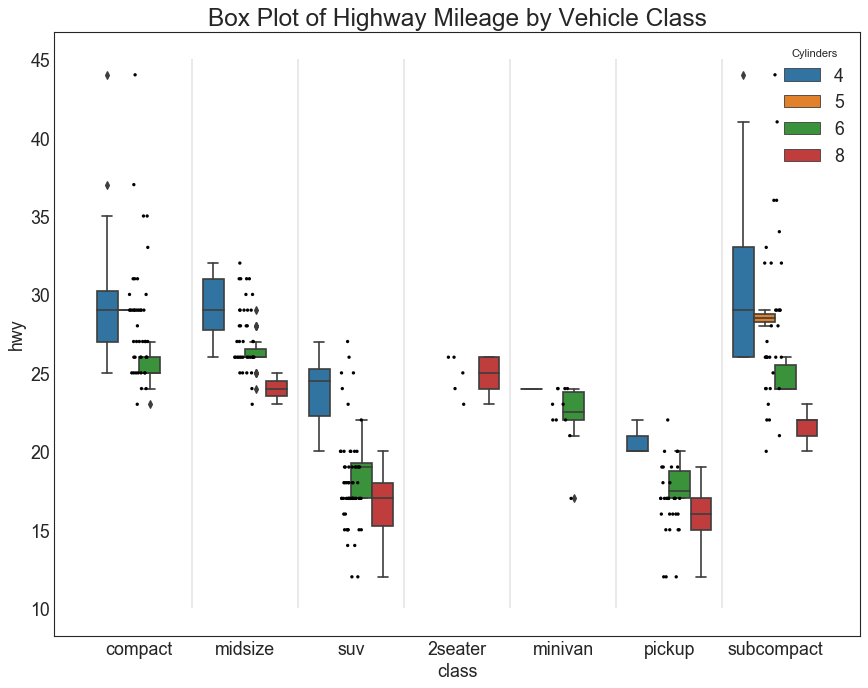

In [491]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

# Population Pyramid

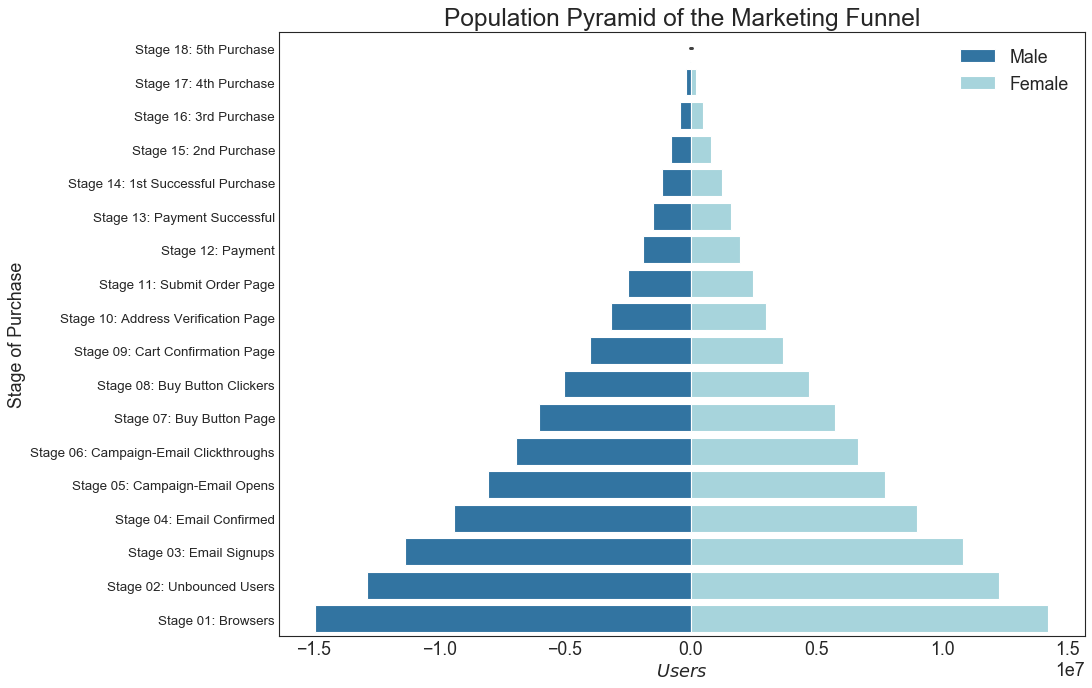

In [494]:
# Read data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.tab20(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

# Categorical Plots

In [495]:
# Load Dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


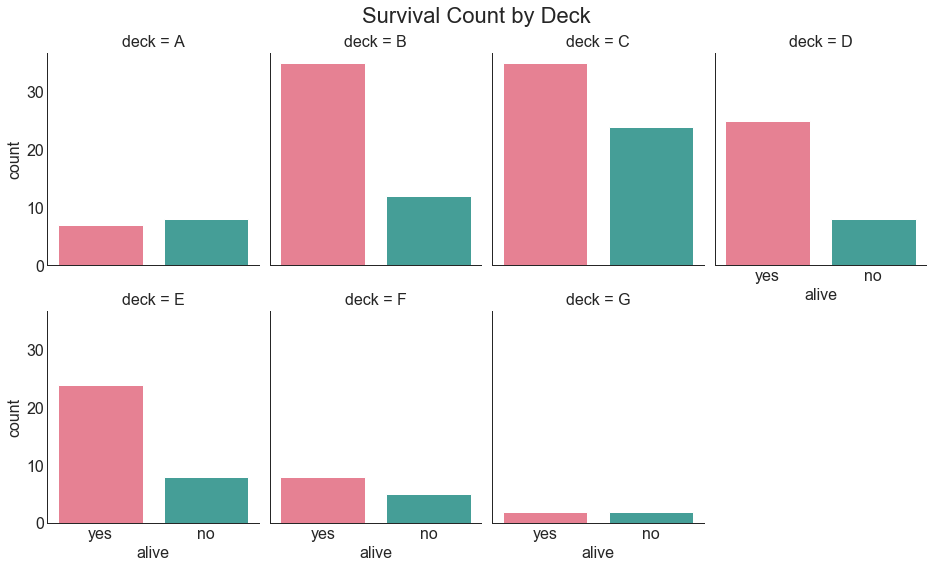

In [518]:
# Plotting:

graphs = sns.catplot('alive', col='deck', col_wrap = 4,
                    data = titanic[titanic.deck.notnull()],
                    kind="count", height = 4, aspect = 0.8,
                    palette = 'husl')

plt.subplots_adjust(top=0.9) # Adjusts the charts down so you can see the title
graphs.fig.suptitle('Survival Count by Deck') # Adds a centred title

plt.show()

# Waffle Chart

In [521]:
# Using the game data used for the density plot above df = dens
dens.describe(include = 'all')

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
count,65.000000,65,65,65.0,65,65,65.000000
unique,NaN,37,7,NaN,10,5,NaN
top,NaN,FIFA 16,PS4,NaN,Sports,Electronic Arts,NaN
freq,NaN,4,16,NaN,19,19,NaN
mean,2009.030769,NaN,NaN,2015.0,NaN,NaN,1.992154
std,1416.390295,NaN,NaN,0.0,NaN,NaN,2.381631
min,34.000000,NaN,NaN,2015.0,NaN,NaN,0.450000
25%,682.000000,NaN,NaN,2015.0,NaN,NaN,0.610000
50%,1739.000000,NaN,NaN,2015.0,NaN,NaN,1.170000
75%,3288.000000,NaN,NaN,2015.0,NaN,NaN,2.320000


In [523]:
#! pip install pywaffle

In [524]:
from pywaffle import Waffle

# Preparing Data
waff = dens.groupby('Platform').size().reset_index(name = 'counts') # size returns the number of elements along an axis

In [525]:
waff

,Platform,counts
0,3DS,11
1,PC,4
2,PS3,6
3,PS4,16
4,WiiU,8
5,X360,6
6,XOne,14


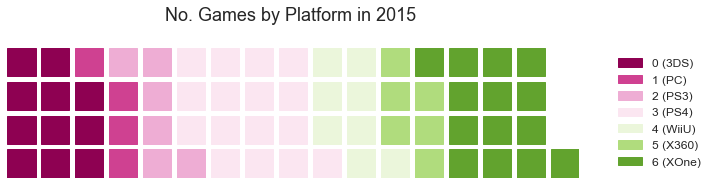

In [557]:
# Further Data prep
n_cats = waff.shape[0]
colors = [plt.cm.PiYG(i/float(n_cats)) for i in range(n_cats)]

#Plotting:
fig = plt.figure(FigureClass = Waffle,
                plots={
                    '111': {
                        'values' : waff['counts'],
                        'labels' : ["{0} ({1})".format(n[0], n[1]) for n in waff[['Platform', 'counts']].itertuples()],
                        'legend' : {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
                        'title' : {'label': 'No. Games by Platform in 2015 \n', 'loc': 'center', 'fontsize':18}
                    },
                },
                rows = 4,
                colors = colors,
                figsize = (10, 12)
            )

# Waffle Chart with Multiple Inputs

In [585]:
# Prepare Data

# By Publisher Data
df_publisher = dens.groupby('Publisher').size().reset_index(name='counts_publisher')
n_categories = df_publisher.shape[0]
colors_publisher = [plt.cm.inferno(i/float(n_categories)) for i in range(n_categories)]

# By Genre Data
df_genre = dens.groupby('Genre').size().reset_index(name='counts_genre')
n_categories = df_genre.shape[0]
colors_genre = [plt.cm.gist_stern(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
df_platform = dens.groupby('Platform').size().reset_index(name = 'counts_platform')
n_categories = df_platform.shape[0]
colors_platform = [plt.cm.PiYG(i/float(n_categories)) for i in range(n_categories)]

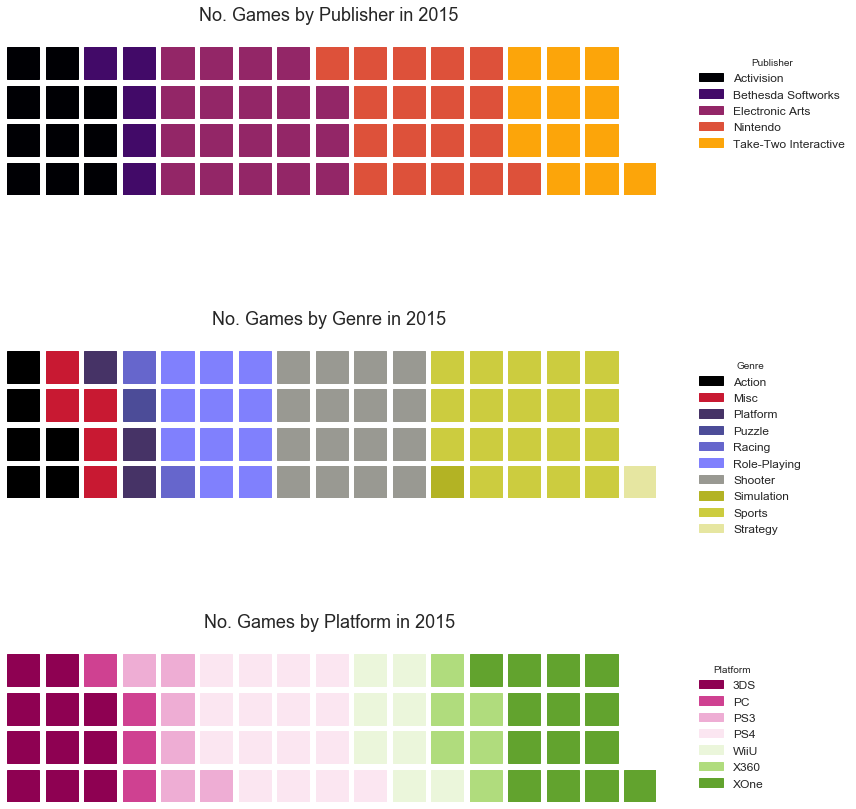

In [586]:
# Draw Plot and Decorate
fig = plt.figure(FigureClass=Waffle,
    plots={
        '311': {
            'values': df_publisher['counts_publisher'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_publisher[['Publisher', 'counts_publisher']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Publisher'},
            'title': {'label': 'No. Games by Publisher in 2015 \n', 'loc': 'center', 'fontsize':18},
            'colors': colors_publisher
        },
        '312': {
            'values': df_genre['counts_genre'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_genre[['Genre', 'counts_genre']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Genre'},
            'title': {'label': 'No. Games by Genre in 2015 \n', 'loc': 'center', 'fontsize':18},
            'colors': colors_genre
        },
        '313': {
            'values': df_platform['counts_platform'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_platform[['Platform', 'counts_platform']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Platform'},
            'title': {'label': 'No. Games by Platform in 2015 \n', 'loc': 'center', 'fontsize':18},
            'colors': colors_platform
        }
    },
    rows=4,
    figsize=(12, 14)
)

# Treemap

In [588]:
# pip install squarify

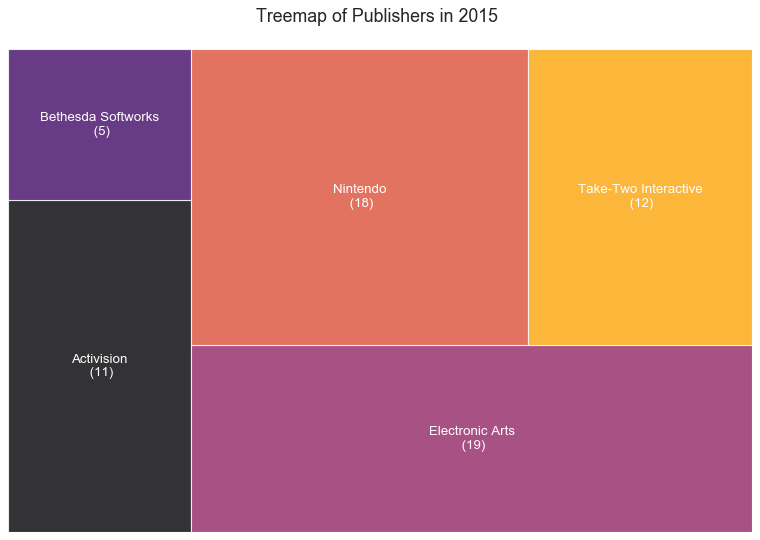

In [595]:
import squarify

# Prepare data
df_pubs = dens.groupby('Publisher').size().reset_index(name = 'counts')
labels = df_pubs.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_pubs['counts'].values.tolist()
colors = [plt.cm.inferno(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, 
              text_kwargs={'color': 'white', 'fontsize' : 12})

# Decorate
plt.title('Treemap of Publishers in 2015 \n')
plt.axis('off')
plt.show()

# Bar Chart

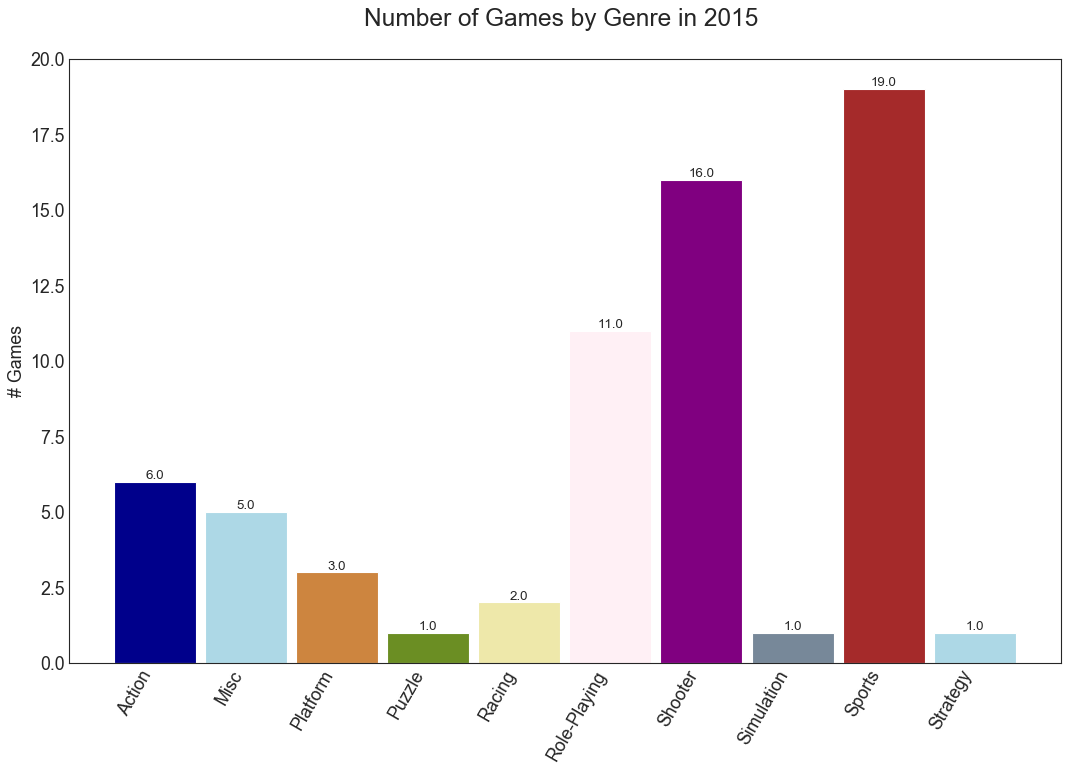

In [605]:
import random

# Prepare Data
gens = dens.groupby('Genre').size().reset_index(name='counts')
n = gens['Genre'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys()) # Getting all colors for list to randomly choose from
random.seed(100) # using import random above
c = random.choices(all_colors, k=n) # Choosing random colors for each bar

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(gens['Genre'], gens['counts'], color=c, width=0.9)
for i, val in enumerate(gens['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(gens['Genre'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Games by Genre in 2015 \n", fontsize=22)
plt.ylabel('# Games')
plt.ylim(0, 20)
plt.show()

# Time Series Plot

In [618]:
# Preparing Data

ts = games.groupby('Year')['Global_Sales'].sum().reset_index(name = 'Global_Sales')
ts = ts[(ts["Year"] != 2017)& (ts["Year"] != 2020)& (ts["Year"] != 2016)]

# Changing Year to datetime for the plot below:
ts['Year'] = pd.to_datetime(ts['Year'], format = "%Y")

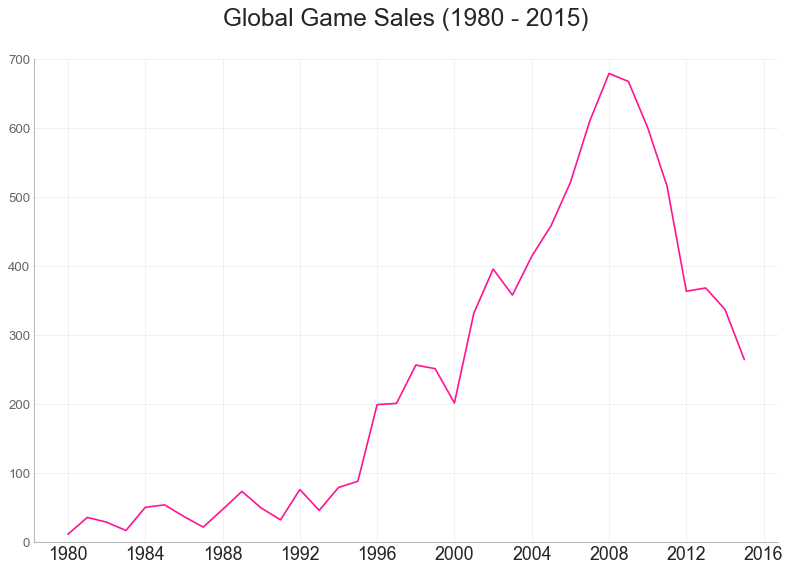

In [629]:
# Plotting:
plt.figure(figsize = (12,8), dpi = 80)
plt.plot('Year', 'Global_Sales', data = ts, color = 'deeppink')

# Decoration
plt.ylim(0, 700)
xtick_location = ts.index.tolist()[::12]
plt.yticks(fontsize=12, alpha=.7)
plt.title("Global Game Sales (1980 - 2015)\n", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

# Multiple Time Series

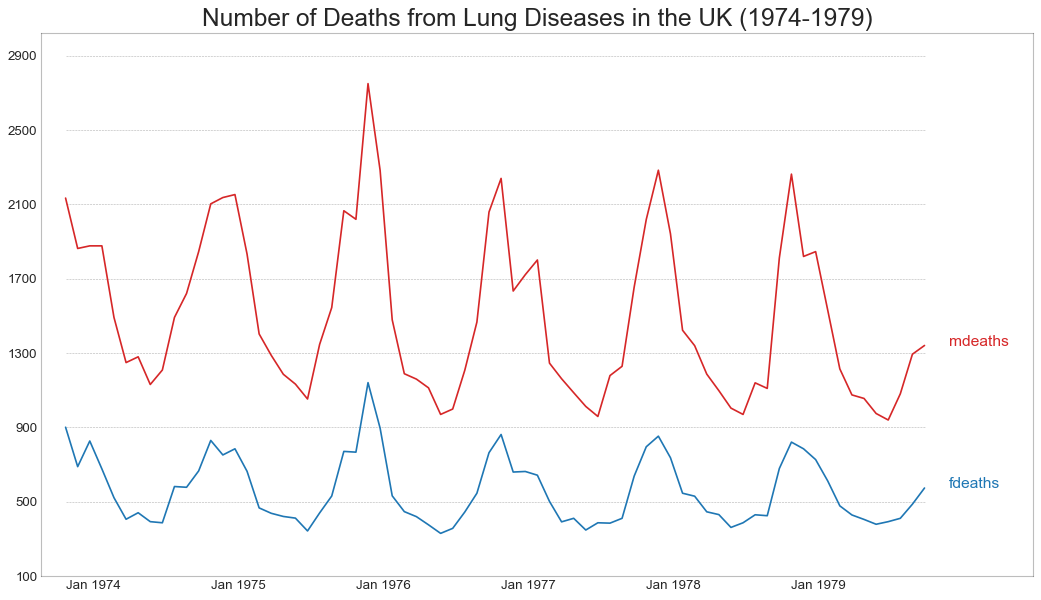

In [684]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

# Time Series Different Y Axis

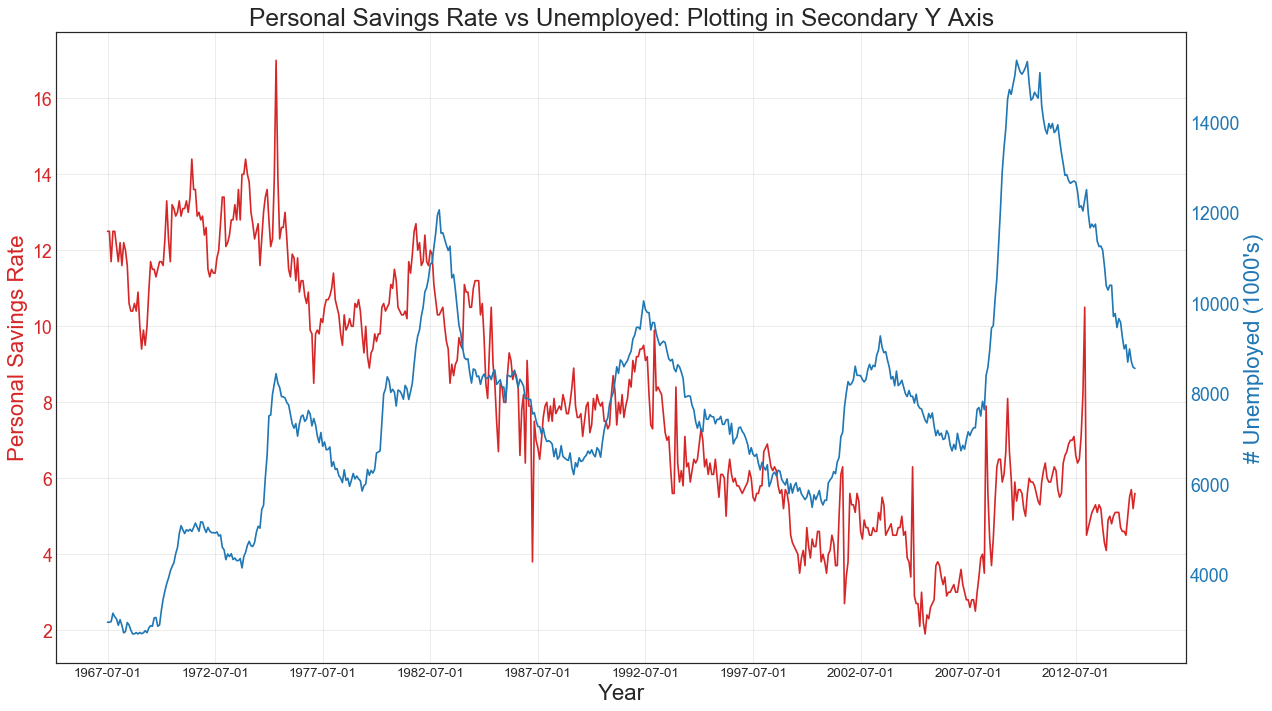

In [686]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # makes a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()

# Dendrogram

In [737]:
# Preparing Data
vgs = pd.read_csv('07_group_project_1/data/video_game_sales.csv')
vgs = vgs[vgs['Global_Sales'] > 20.0] # removing all games with Global Sales under 20mn units
vgs = vgs.assign(short_name=vgs['Name'].str[:18]) # Making shorter name labels
vgs.reset_index().head()

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,short_name
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros.
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokemon Red/Pokemo


In [707]:
# Import:
import scipy.cluster.hierarchy as shc

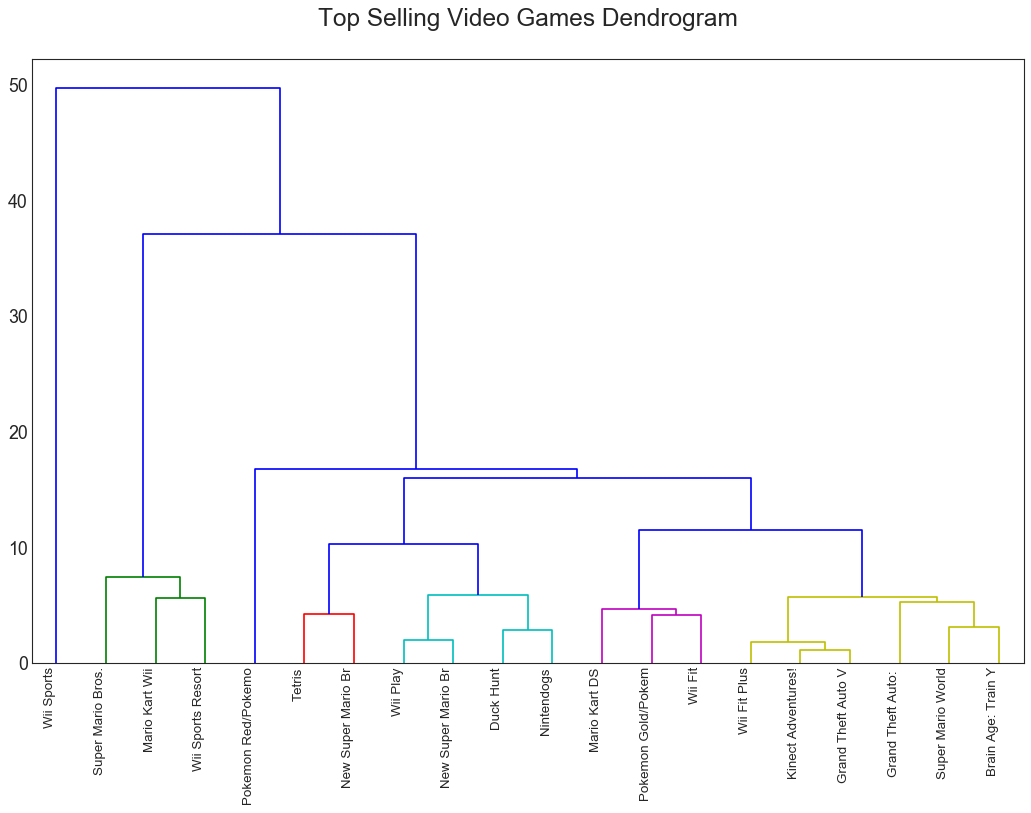

In [735]:
# Plotting:
plt.figure(figsize = (16,10), dpi = 80)
plt.title("Top Selling Video Games Dendrogram\n", fontsize = 22)
dend = shc.dendrogram(shc.linkage(vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']], # Adding these values together
                                  method = 'ward'), 
                      labels= vgs.short_name.values, 
                      color_threshold =10) # threshold is below what values will color separate values

# Ward’s method says that the distance between two clusters, A and B, is how
# much the sum of squares will increase when we merge them

plt.xticks(fontsize=12)
plt.gca().set_xticklabels(vgs['short_name'], rotation=90, horizontalalignment= 'right')
plt.show()

# Cluster Plot

In [748]:
# Imports:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

C:\Users\rozhouse\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rozhouse\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\rozhouse\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


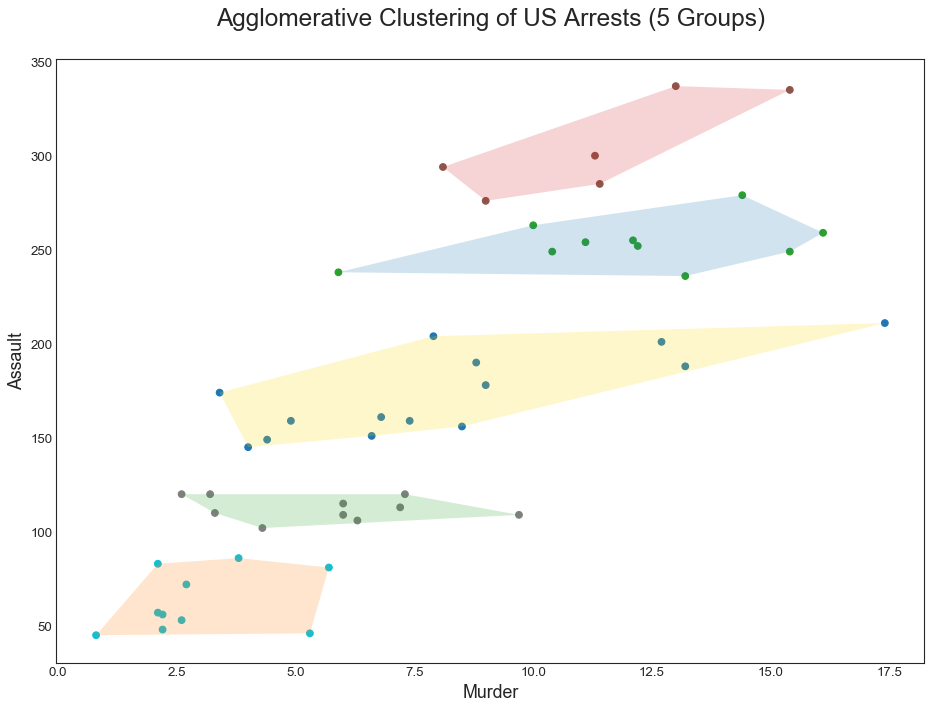

In [752]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of US Arrests (5 Groups)\n', fontsize=22)
plt.show()